# 6.6 Lab 2: Ridge Regression and the Lasso

Implement Labs using **Python** in the book "An Introduction to Statistical Learning with Applications in R".
https://link.springer.com/book/10.1007/978-1-4614-7138-7
**Authors**
Gareth James, Daniela WittenTrevor Hastie, Robert Tibshirani

We will perform ridge regression and the Lasso in order to predict **Salary** on the **Hitters** data.
Before proceeding, ensure that the missing values have been removed from the data.

In [112]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

Import Hitters.csv file as DataFrame and drop the record with NAN value

In [63]:
Hitters = pd.read_csv('Hitters.csv', index_col = 0).dropna()

# Pre-processing the data

Check the columns of the data

In [64]:
print(Hitters.columns.values)

['AtBat' 'Hits' 'HmRun' 'Runs' 'RBI' 'Walks' 'Years' 'CAtBat' 'CHits'
 'CHmRun' 'CRuns' 'CRBI' 'CWalks' 'League' 'Division' 'PutOuts' 'Assists'
 'Errors' 'Salary' 'NewLeague']


Example of the records

In [65]:
print(Hitters.iloc[0,:])

AtBat         315
Hits           81
HmRun           7
Runs           24
RBI            38
Walks          39
Years          14
CAtBat       3449
CHits         835
CHmRun         69
CRuns         321
CRBI          414
CWalks        375
League          N
Division        W
PutOuts       632
Assists        43
Errors         10
Salary        475
NewLeague       N
Name: -Alan Ashby, dtype: object


Change the qualitative variables to dummies, i.e., League, Division, NewLeague

In [66]:
Hitters = pd.get_dummies(Hitters, columns=['League', 'Division','NewLeague'], drop_first = True)
print(Hitters.iloc[0,:])

AtBat           315.0
Hits             81.0
HmRun             7.0
Runs             24.0
RBI              38.0
Walks            39.0
Years            14.0
CAtBat         3449.0
CHits           835.0
CHmRun           69.0
CRuns           321.0
CRBI            414.0
CWalks          375.0
PutOuts         632.0
Assists          43.0
Errors           10.0
Salary          475.0
League_N          1.0
Division_W        1.0
NewLeague_N       1.0
Name: -Alan Ashby, dtype: float64


Standardize the variables: centered in its mean and with unit standard deviation

In [68]:
scaler = StandardScaler(with_mean = False)
Hitters = pd.DataFrame(scaler.fit_transform(Hitters), columns = Hitters.columns)
y = Hitters.Salary
X = Hitters.drop('Salary', axis =1)

# Ridge regression

## Ridge regression example

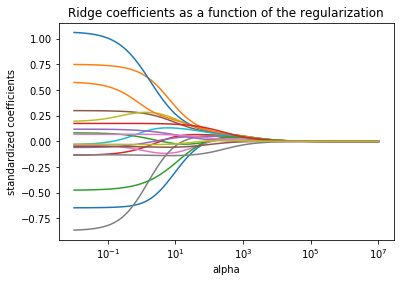

In [154]:
# Shrinkage parameter : 10^-2, 10^10
alphas = np.logspace(-2, 7,100 )

# Implement Ridge regression with different shrinkage parameter
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standardized coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


## Vadiation set approach to evaluate the ridge regression

In [146]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=0)

def Ridge_VS_mse(alpha_val, X_train, y_train, X_test, y_test):
    ridge_train = Ridge(alpha = alpha_val)
    ridge_train.fit(X_train, y_train)
    return round(mean_squared_error(y_test, ridge_train.predict(X_test)), 3)

alphas = [0, 4, 10000000]

mse = []

for a in alphas:
    mse.append(Ridge_VS_mse(a, X_train, y_train, X_test, y_test))

ls = LinearRegression()
ls.fit(X_train, y_train)
mse_ls = mean_squared_error(y_test, ls.predict(X_test))
mse_Null = np.mean((y_test - np.mean(y_train))**2)

print('shrinkage parameters are:', *alphas, sep = ', ')
print('Notice: alpha = {}-> least square; alpha = {}-> Null model\n'.format(alphas[0], alphas[2]))
print('Validation set MSEs are:', *mse, sep = ', ')
print('Validation set MSE for least square regression is: {:0.3f}'.format(mse_ls))
print('Validation set MSE for Null model is: {:0.3f}'.format(mse_Null))


shrinkage parameters are:, 0, 4, 10000000
Notice: alpha = 0-> least square; alpha = 10000000-> Null model

Validation set MSEs are: [0.664, 0.627, 1.144]
Validation set MSE for least square regression is: 0.664
Validation set MSE for Null model is: 1.144


## Cross Validation for Ridge Regression

### Cross Validation by applying "RidgeCV" module

In [149]:
ridgeCV = RidgeCV(alphas = np.logspace(-2, 10, 100), cv = 10, scoring = 'neg_mean_squared_error')
ridgeCV.fit(X_train,y_train)

ridgeCV_best_alpha = ridgeCV.alpha_

ridgeCV_test_mse = mean_squared_error(y_test, ridgeCV.predict(X_test))

ridge_best_full = Ridge(alpha = ridgeCV_best_alpha)
ridge_best_full.fit(X,y)
coef = ridge_best_full.coef_
print('RidgeCV:\n')
print('The best shrinkage parameter: {:0.3f}'.format(ridgeCV_best_alpha))
print('The MSE on test data: {:0.3f}'.format(ridgeCV_test_mse))
print('Standardized coefficients for ridge regression on whole data set with the best shrinkage parameter:', coef)

RidgeCV:

The best shrinkage parameter: 132.194
The MSE on test data: 0.637
Standardized coefficients for ridge regression on whole data set with the best shrinkage parameter: [ 0.01316726  0.09838332  0.00429757  0.06267605  0.05024077  0.08542439
  0.00406625  0.05693114  0.09120568  0.08061098  0.09252736  0.09648416
  0.01988383  0.11647276  0.01289134 -0.02549553  0.02924167 -0.09968118
  0.00846062]


### Cross validation by using "model_selection" module

In [175]:
ridge_cv_mse = []
alphas = np.logspace(-2, 10, 100)
for a in alphas:
    ridge = Ridge(alpha = a)
    score = -model_selection.cross_val_score(ridge, X_train, y_train.ravel(), cv = 10, scoring = 'neg_mean_squared_error').mean()
    ridge_cv_mse.append(score)

best_cv_score = min(ridge_cv_mse)    
best_alpha = alphas[np.where(ridge_cv_mse == best_cv_score)[0][0]]

ridge_best = Ridge(alpha = best_alpha)
ridge_best.fit(X_train, y_train)
ridge_test_score = mean_squared_error(y_test, ridge_best.predict(X_test))

print('model_selection:\n')
print('The best shrinkage parameter: {:0.3f}'.format(best_alpha))
print('The estimated test_MSE by CV on training data: {:0.3f}'.format(best_cv_score))
print('The MSE on test data: {:0.3f}'.format(ridge_test_score))


model_selection:

The best shrinkage parameter: 132.194
The estimated test_MSE by CV on training data: 0.574
The MSE on test data: 0.637


**model_selection** module is more flexible to use, because the cv **score** for each shrinkage parameter can be recorded and visualized.

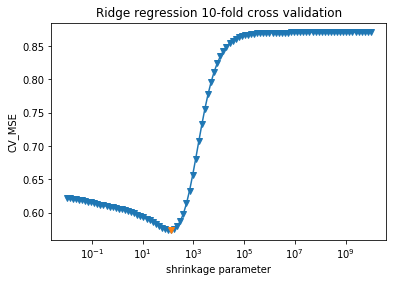

In [176]:
ax = plt.gca()
ax.plot(alphas, ridge_cv_mse, '-v')
ax.plot(best_alpha, best_score, marker = 'v')
ax.set_xscale('log')
plt.xlabel('shrinkage parameter')
plt.ylabel('CV_MSE')
plt.title('Ridge regression 10-fold cross validation')
plt.axis('tight')
plt.show()

# LASSO regression

## Lasso regression example

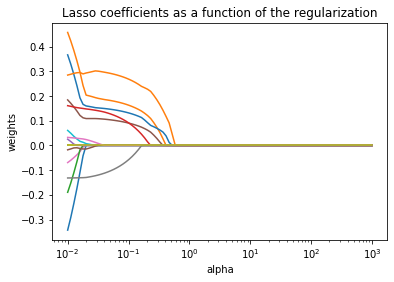

In [153]:
alphas = np.logspace(-2, 3, 100 )
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Cross validation for Lasso

### Cross validation by using "LassoCV" module

In [163]:
lasso_cv = LassoCV(alphas = np.logspace(-2, 10, 100), cv = 10)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.alpha_
lasso_test_mse = mean_squared_error(y_test, lasso_cv.predict(X_test))

lasso_best_full = Lasso(alpha = best_alpha)
lasso_best_full.fit(X, y)
lasso_coef = lasso_best_full.coef_

print('Best shrinkage parameter: {:0.3f}\nMSE on test data: {:0.3f}\n '.format(best_alpha, lasso_test_mse))
print('Standardized coefficients for full data set:', lasso_coef)


Best shrinkage parameter: 0.071
MSE on test data: 0.674
 
Standardized coefficients for full data set: [ 0.          0.17413263  0.          0.          0.          0.09822367
  0.          0.          0.          0.          0.14038961  0.28215058
  0.          0.11280495 -0.         -0.          0.         -0.08480695
  0.        ]


### Cross validation by using "model_selection" module

In [170]:
lasso_cv_mse = []
alphas = np.logspace(-2, 10, 100)
for a in alphas:
    lasso = Lasso(alpha = a)
    score = -model_selection.cross_val_score(lasso, X_train, y_train.ravel(), cv = 10, scoring = 'neg_mean_squared_error').mean()
    lasso_cv_mse.append(score)

best_cv_score = min(lasso_cv_mse)    
best_alpha = alphas[np.where(lasso_cv_mse == best_cv_score)[0][0]]

lasso_best = Lasso(alpha = best_alpha)
lasso_best.fit(X_train, y_train)
lasso_test_score = mean_squared_error(y_test, lasso_best.predict(X_test))

print('model_selection:\n')
print('The best shrinkage parameter: {:0.3f}'.format(best_alpha))
print('The estimated test_MSE by CV on training data: {:0.3f}'.format(best_cv_score))
print('The MSE on test data: {:0.3f}'.format(lasso_test_score))

model_selection:

The best shrinkage parameter: 0.071
The estimated test_MSE by CV on training data: 0.583
The MSE on test data: 0.674


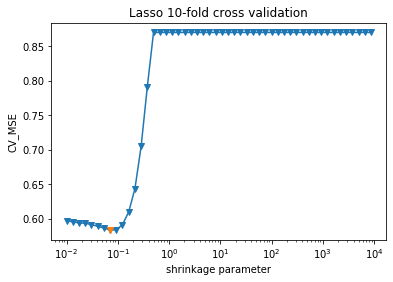

In [173]:
ax = plt.gca()
ax.plot(alphas[0:50], lasso_cv_mse[0:50], '-v')
ax.plot(best_alpha, best_cv_score, marker = 'v')
ax.set_xscale('log')
plt.xlabel('shrinkage parameter')
plt.ylabel('CV_MSE')
plt.title('Lasso 10-fold cross validation')
plt.axis('tight')
plt.show()